In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def compute_gradients(image):
    I_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    I_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    return I_x, I_y

In [5]:
def structure_tensor(I_x, I_y, window_size=3):
    I_xx = I_x**2
    I_yy = I_y**2
    I_xy = I_x * I_y

    I_xx = cv2.GaussianBlur(I_xx, (window_size, window_size), 1)
    I_yy = cv2.GaussianBlur(I_yy, (window_size, window_size), 1)
    I_xy = cv2.GaussianBlur(I_xy, (window_size, window_size), 1)

    return I_xx, I_yy, I_xy

In [7]:
def harris_response(I_xx, I_yy, I_xy, k=0.04):
    det_M = I_xx * I_yy - I_xy**2
    trace_M = I_xx + I_yy

    R = det_M - k * (trace_M ** 2)
    return R

In [9]:
def non_maximum_suppression(R, threshold=0.01):
    corners = np.zeros_like(R)
    corners[R > threshold * R.max()] = 1
    return corners

In [10]:
def draw_corners(image, corners):
    output_image = np.copy(image)
    output_image = cv2.cvtColor(output_image, cv2.COLOR_GRAY2BGR)

    corner_points = np.argwhere(corners == 1)
    for point in corner_points:
        y, x = point
        cv2.circle(output_image, (x, y), 2, (0, 255, 0), -1)

    return output_image

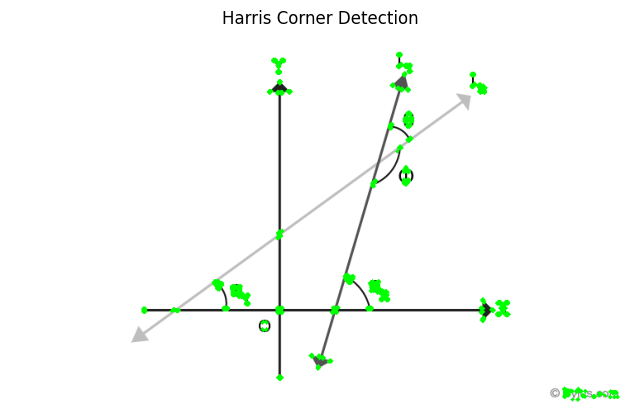

In [14]:
def harris_corner_detection(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    I_x, I_y = compute_gradients(image)

    I_xx, I_yy, I_xy = structure_tensor(I_x, I_y)

    R = harris_response(I_xx, I_yy, I_xy)

    corners = non_maximum_suppression(R)

    output_image = draw_corners(image, corners)

    plt.figure(figsize=(8, 6))
    plt.imshow(output_image)
    plt.title("Harris Corner Detection")
    plt.axis('off')
    plt.show()

harris_corner_detection('/content/Angle-Between-Two-Lines-01.png')